In [45]:
import helperfunction as hf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
invoice_df = hf.create_df('invoice_data')
invoice_df.head()

Current work Directory C:\Users\jahna\OneDrive\Documents\GitHub\Customer-Segmentation\Code
File Path is  C:\Users\jahna\OneDrive\Documents\GitHub\Customer-Segmentation\Code\invoice_data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
print("Number of Records in the dataset", invoice_df.shape)

Number of Records in the dataset (541909, 8)


In [4]:
invoice_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Preprocessing

## Data Cleaning

### Handling Missing Values

In [5]:
print(f"Number of observations with NULL CustomerID: {invoice_df[invoice_df.CustomerID.isnull()].shape[0]}")

Number of observations with NULL CustomerID: 135080


In [6]:
null_cust_df = invoice_df[invoice_df.CustomerID.isnull()]

In [7]:
null_cust_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [8]:
hf.print_observation("There are valid invoices without customer ID")

OBSERVATION:  There are valid invoices without customer ID


In [9]:
invoice_df.dropna(subset=['CustomerID'], inplace=True)

In [10]:
print("Number of Records after dropping Null CustomerID", invoice_df.shape)

Number of Records after dropping Null CustomerID (406829, 8)


In [11]:
invoice_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Check for Duplicates

In [13]:
duplicates_all = invoice_df[invoice_df.duplicated()]

In [39]:
duplicates_all

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [37]:
duplicates = invoice_df[invoice_df.duplicated(subset=['InvoiceNo', "StockCode", "Quantity"])]

In [38]:
duplicates.shape

(5281, 8)

In [25]:
duplicates["InvoiceNo"].unique

<bound method Series.unique of 517       536409
527       536409
537       536409
539       536409
555       536412
           ...  
541675    581538
541689    581538
541692    581538
541699    581538
541701    581538
Name: InvoiceNo, Length: 5281, dtype: object>

In [33]:
invoice_df[(invoice_df["InvoiceNo"] == "536409") & (invoice_df["StockCode"] == "22866")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.1,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.1,17908.0,United Kingdom


In [40]:
invoice_df = invoice_df.drop_duplicates(subset=['InvoiceNo', "StockCode", "Quantity"])
print("Number of Records after dropping duplicates", invoice_df.shape)

Number of Records after dropping duplicates (401548, 8)


## EDA on Quantity

In [41]:
invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [43]:
print("Summary statistics for 'Quantity':")
print(invoice_df['Quantity'].describe())

Summary statistics for 'Quantity':
count    401548.000000
mean         12.185721
std         250.297274
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


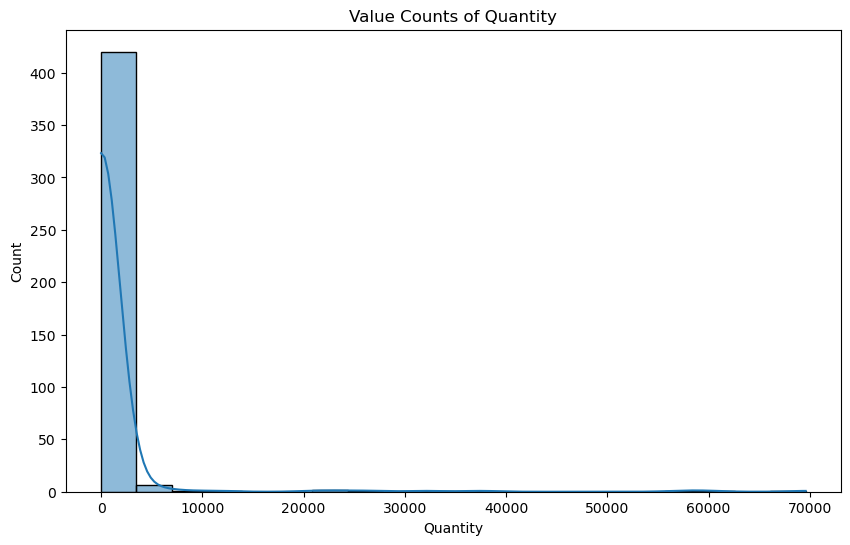

In [54]:
quantity_counts = invoice_df['Quantity'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 6))
sns.histplot(quantity_counts, bins=20, kde=True)
plt.title('Value Counts of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

In [57]:
quantity_counts

Quantity  Quantity
False     -1          3799
          -2          1326
          -3           576
          -12          517
          -6           468
                      ... 
True       115           1
           116           1
           117           1
           129           1
           80995         1
Name: count, Length: 436, dtype: int64

In [58]:
pos_quantity = invoice_df[invoice_df['Quantity'] >= 0]
neg_quantity = invoice_df[invoice_df['Quantity'] < 0]

### Negative Quantity

In [62]:
neg_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [65]:
neg_quantity.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8841.000000,8841,8841.000000,8841.000000
mean,-30.794028,2011-06-27 07:09:03.108245760,18.115858,14989.692456
min,-80995.000000,2010-12-01 09:41:00,0.010000,12346.000000
25%,-6.000000,2011-03-23 08:55:00,1.450000,13505.000000
50%,-2.000000,2011-07-11 13:38:00,2.950000,14868.000000
75%,-1.000000,2011-10-06 20:36:00,4.950000,16393.000000
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000
std,1174.279398,NaN,444.454894,1707.903004


In [69]:
neg_quantity[~(neg_quantity['InvoiceNo'].str.contains('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [70]:
hf.print_observation("All the entrees with a negative quantity are Cancellation invoices")

OBSERVATION:  All the entrees with a negative quantity are Cancellation invoices


### Positive Quantity

In [72]:
pos_quantity.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392707.000000,392707,392707.000000,392707.000000
mean,13.153323,2011-07-10 19:17:13.836881152,3.105738,15287.814090
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.593481,NaN,21.518832,1713.539957


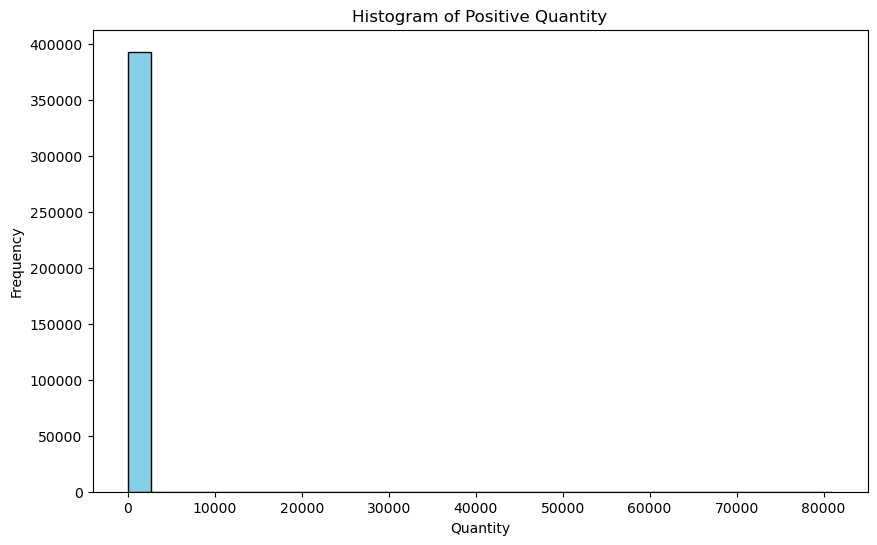

In [75]:
plt.figure(figsize=(10, 6))
plt.hist(pos_quantity['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Positive Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

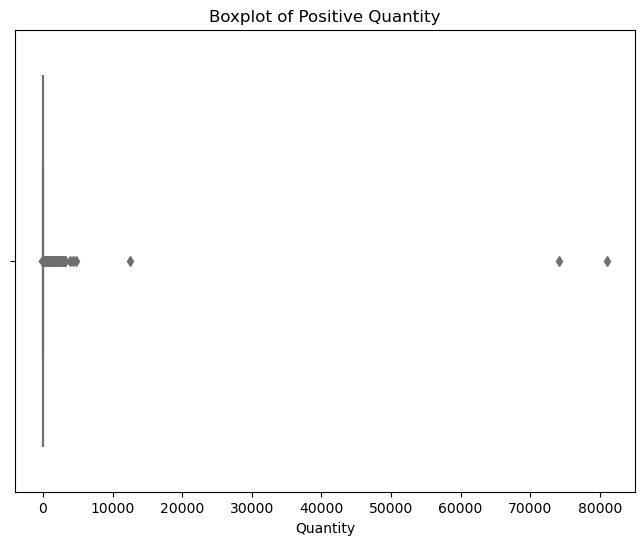

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=pos_quantity['Quantity'], color='skyblue')
plt.title('Boxplot of Positive Quantity')
plt.xlabel('Quantity')
plt.show()